In [ ]:
# Generate state preparation quantum circuit:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
import random

plt.rcParams['pdf.fonttype'] = 42

q_num = 27
q_axis_num = q_num // 3
circ = QuantumCircuit(q_num)

def decaying(k):
    C = 1
    L = 2*np.pi
    cL = 1
    p0 = 2
    beta = 15
    c_eta = 0.01
    eta = 0.01
    lam = 5/3
    f_L = (k*L/np.sqrt((k*L)**2 + cL))**(p0 + lam)
    f_eta = np.exp(-beta*(((k*eta)**4 + c_eta**4)**(1/4) - c_eta))
    D = C*k**(-lam)*f_L*f_eta
    return D

import csv, os

def delete_file(file_path):
    try:
        os.remove(file_path)
        print(f"File {file_path} has been deleted.")
    except FileNotFoundError:
        print(f"Error: File {file_path} is not found.")
    except PermissionError:
        print(f"Error: Do not have permission to delete {file_path}.")
    except Exception as e:
        print(f"Error: {e}.")

# file_path = fr'gate_parameters_psi1.csv'
# delete_file(file_path)

# try:
#     with open(file_path, 'x', newline='') as file:
#         writer = csv.writer(file)
#         writer.writerow(['alpha', 'beta', 'gamma'])
# except FileExistsError:   # The file already exists.
#     pass

def single_qubit_gate(q_axis_num):
    for i in range(q_axis_num):
        k = 2**i - 1

        # x direction:
        theta = decaying(abs(k)+1)*np.random.normal(loc=0.0, scale=1.0, size=None)
        phi = decaying(abs(k)+1)*np.random.normal(loc=0.0, scale=1.0, size=None)
        gamma = decaying(abs(k)+1)*np.random.normal(loc=0.0, scale=1.0, size=None)
        circ.u(theta, phi, gamma, i)
        # with open(file_path, 'a', newline='') as file:
        #     writer = csv.writer(file)
        #     writer.writerow([theta, phi, gamma])

        # y direction:
        theta = decaying(abs(k)+1)*np.random.normal(loc=0.0, scale=1.0, size=None)
        phi = decaying(abs(k)+1)*np.random.normal(loc=0.0, scale=1.0, size=None)
        gamma = decaying(abs(k)+1)*np.random.normal(loc=0.0, scale=1.0, size=None)
        circ.u(theta, phi, gamma, i+q_axis_num)
        # with open(file_path, 'a', newline='') as file:
        #     writer = csv.writer(file)
        #     writer.writerow([theta, phi, gamma])

        # z direction:
        theta = decaying(abs(k)+1)*np.random.normal(loc=0.0, scale=1.0, size=None)
        phi = decaying(abs(k)+1)*np.random.normal(loc=0.0, scale=1.0, size=None)
        gamma = decaying(abs(k)+1)*np.random.normal(loc=0.0, scale=1.0, size=None)
        circ.u(theta, phi, gamma, i+2*q_axis_num)
        # with open(file_path, 'a', newline='') as file:
        #     writer = csv.writer(file)
        #     writer.writerow([theta, phi, gamma])

# layer 1:
for i in range(10):
    single_qubit_gate(q_axis_num)

# layer 2:
circ.cx(0, 2)
circ.cx(1, 3)    #!
circ.cx(4, 5)
circ.cx(9, 11)
circ.cx(10, 12)  #!
circ.cx(13, 14)
circ.cx(18, 20)
circ.cx(19, 21)  #!
circ.cx(22, 23)

circ.cx(7, 8)
circ.cx(16, 17)
circ.cx(25, 26)

circ.cx(8, 6)
circ.cx(17, 15)
circ.cx(26, 24)

# layer 3:
for i in range(10):
    single_qubit_gate(q_axis_num)

# layer 4:
circ.cx(0, 10)
circ.cx(9, 19)
circ.cx(18, 1)

circ.cx(2, 12)
circ.cx(11, 21)
circ.cx(20, 3)

circ.cx(2, 11)
circ.cx(11, 20)
circ.cx(20, 2)

# layer 5:
for i in range(10):
    single_qubit_gate(q_axis_num)

# layer 6:
circ.cx(1, 11)    #!
circ.cx(10, 20)     #!
circ.cx(19, 2)   #!

circ.cx(0, 12)
circ.cx(9, 21)
circ.cx(18, 3)

circ.cx(3, 12)
circ.cx(12, 21)
circ.cx(21, 3)

# layer 7:
for i in range(10):
    single_qubit_gate(q_axis_num)

# layer 8:
circ.cx(0, 11)   #!
circ.cx(9, 20)    #!
circ.cx(18, 2)  #!

circ.cx(1, 12)
circ.cx(10, 21)
circ.cx(19, 3)

circ.cx(4, 13)
circ.cx(13, 22)
circ.cx(22, 4)

print(f'Depth of the original circuit: {circ.depth()}')

# circ.draw('mpl')

# compiled_circ = transpile(circ, basis_gates=['u3', 'cx'], optimization_level=3)
# print(f'Depth of the compiled circuit: {compiled_circ.depth()}')
# display(compiled_circ.draw('mpl', style='iqx'))


Depth of the original circuit: 47


In [32]:
circ.save_state()
simulator = AerSimulator(method='statevector')
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
result.data(0)

tmp = np.zeros(2**q_num, dtype='complex128')
for i in range(2**q_num):
    tmp[i] = result.data(0)['statevector'][i]

# Output the initial wave function in spectral space:
psi = tmp.reshape(2**q_axis_num, 2**q_axis_num, 2**q_axis_num)

psi.tofile(fr'psi1_3D-{2**q_axis_num}.plt')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import U3Gate
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

plt.rcParams['pdf.fonttype'] = 42

q_num = 27
q_axis_num = q_num // 3

def decaying(k):
    C = 1
    L = 2*np.pi
    cL = 1
    p0 = 2
    beta = 15
    c_eta = 0.01
    eta = 0.01
    lam = 5/3
    f_L = (k*L/np.sqrt((k*L)**2 + cL))**(p0 + lam)
    f_eta = np.exp(-beta*(((k*eta)**4 + c_eta**4)**(1/4) - c_eta))
    D = C*k**(-lam)*f_L*f_eta
    return D

all_qubit_matrices = [[] for _ in range(q_num)]

def generate_and_store_gate_matrices(q_axis_num):
    for i in range(q_axis_num):
        k = 2**i - 1

        # x direction:
        theta = decaying(abs(k)+1)*np.random.normal(loc=0.0, scale=1.0, size=None)
        phi = decaying(abs(k)+1)*np.random.normal(loc=0.0, scale=1.0, size=None)
        gamma = decaying(abs(k)+1)*np.random.normal(loc=0.0, scale=1.0, size=None)
        u_matrix_x = U3Gate(theta, phi, gamma).to_matrix()
        all_qubit_matrices[i].append(u_matrix_x)

        # y direction:
        theta = decaying(abs(k)+1)*np.random.normal(loc=0.0, scale=1.0, size=None)
        phi = decaying(abs(k)+1)*np.random.normal(loc=0.0, scale=1.0, size=None)
        gamma = decaying(abs(k)+1)*np.random.normal(loc=0.0, scale=1.0, size=None)
        u_matrix_y = U3Gate(theta, phi, gamma).to_matrix()
        all_qubit_matrices[i + q_axis_num].append(u_matrix_y)

        # z direction:
        theta = decaying(abs(k)+1)*np.random.normal(loc=0.0, scale=1.0, size=None)
        phi = decaying(abs(k)+1)*np.random.normal(loc=0.0, scale=1.0, size=None)
        gamma = decaying(abs(k)+1)*np.random.normal(loc=0.0, scale=1.0, size=None)
        u_matrix_z = U3Gate(theta, phi, gamma).to_matrix()
        all_qubit_matrices[i + 2*q_axis_num].append(u_matrix_z)

for i in range(10):
    generate_and_store_gate_matrices(q_axis_num)
    
final_qubit_unitaries = []
for qubit_gates in all_qubit_matrices:
    final_matrix = np.identity(2, dtype=complex)
    if qubit_gates: 
        temp_matrix = qubit_gates[0]
        for i in range(1, len(qubit_gates)):
            temp_matrix = qubit_gates[i] @ temp_matrix
        final_matrix = temp_matrix
        
    final_qubit_unitaries.append(final_matrix)

simplified_circ = QuantumCircuit(q_num)
for i in range(q_num):
    if len(all_qubit_matrices[i]) > 0:
      simplified_circ.unitary(final_qubit_unitaries[i], i, label=f'U_q{i}')

def print_matrix(matrix, precision=10):
    for row in matrix:
        row_str = "│ "
        for val in row:
            real_part = f"{val.real:+.{precision}f}"
            imag_part = f"{val.imag:+.{precision}f}"
            row_str += f"{real_part}{imag_part}j  "
        row_str += "│"
        print(row_str)

for i in range(q_axis_num):
    matrix = final_qubit_unitaries[i]
    print("┌" + " " * 26 + "┐")
    print_matrix(matrix)
    print("└" + " " * 26 + "┘")
    print() 

--- 简化后的电路 ---
简化线路深度 (Depth): 1

--- 每个量子比特上合并后的最终单量子门矩阵 ---
共显示9个矩阵 (量子比特 0 到 8)

--- Qubit 0 的最终 2x2 酉矩阵 ---
┌                          ┐
│ +0.3896003861-0.1639067984j  +0.5266050378-0.7375860863j  │
│ -0.9061378738+0.0161323984j  +0.3557729402-0.2282093652j  │
└                          ┘

--- Qubit 1 的最终 2x2 酉矩阵 ---
┌                          ┐
│ +0.8768157878+0.0148651643j  -0.4104638615+0.2499850385j  │
│ +0.4804645643+0.0112651456j  +0.7519156233-0.4512757410j  │
└                          ┘

--- Qubit 2 的最终 2x2 酉矩阵 ---
┌                          ┐
│ +0.9998069051-0.0001416654j  +0.0193375753-0.0034915196j  │
│ -0.0161174009+0.0112410815j  +0.7054810001-0.7084563684j  │
└                          ┘

--- Qubit 3 的最终 2x2 酉矩阵 ---
┌                          ┐
│ +0.9999612249+0.0000025888j  -0.0087991288+0.0003521485j  │
│ +0.0088008006+0.0003075474j  +0.9999483684-0.0050706928j  │
└                          ┘

--- Qubit 4 的最终 2x2 酉矩阵 ---
┌                          ┐
│ +0.9999994444

-46.051701859880914 0.0


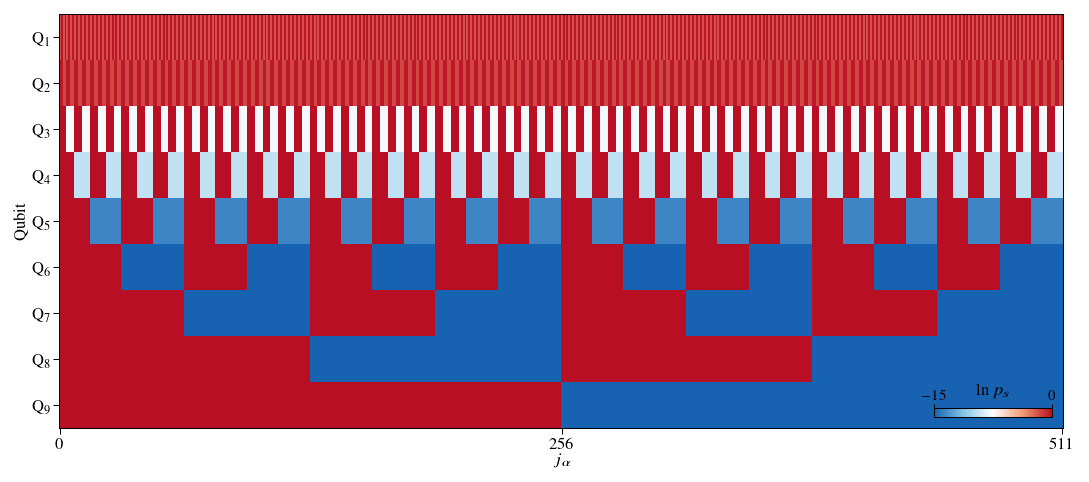

In [87]:
c0 = [0.3896003861-0.1639067984j, 0.8768157878+0.0148651643j, 0.9998069051-0.0001416654j, 0.9999612249+0.0000025888j, 0.9999994444-0.0000000013j, 0.9999999996+0.0000000000j, 1.0000000000-0.0000000001j, 1.0000000000-0.0000000001j, 1.0000000000+0.0000000001j]
c1 = [-0.9061378738+0.0161323984j, 0.4804645643+0.0112651456j, -0.0161174009+0.0112410815j, 0.0088008006+0.0003075474j, -0.0010541361-0.0000037321j, -0.0000280885-0.0000000017j, 0.0000001660+0.0000000000j, 0.0000000000-0.0000000001j, -0.0000000000+0.0000000001j]
p0 = np.abs(c0)**2
p1 = np.abs(c1)**2

k = np.linspace(0, 511, num=512)
q_num = np.linspace(1, 9, num=9)
X, Y = np.meshgrid(k, q_num)

def create_pattern_array_vectorized(p0: np.ndarray, p1: np.ndarray) -> np.ndarray:
    num_q = 9
    num_k = 512
    
    magnitude = np.zeros((num_q, num_k))
    k_indices = np.arange(num_k)
    
    for q_index in range(num_q):
        cycle_length = 2**(q_index + 1)
        half_cycle = 2**q_index
        
        mask_for_p0 = (k_indices % cycle_length) < half_cycle
        magnitude[q_index, :] = np.where(mask_for_p0, p0[q_index], p1[q_index])
    return magnitude

magnitude = create_pattern_array_vectorized(p0, p1)
# right_half = magnitude[:, 256:512]
# left_half = magnitude[:, 0:256]
# magnitude = np.hstack((right_half, left_half))

fig_width = 18/2.54
fig_height = 18/2.54
fig = plt.figure(figsize=(fig_width, fig_height))

ax_width = 17/2.54 / fig_width
ax_height = 7/2.54 / fig_height
cbar_length = 0.15/2.54 / fig_width
cbar_width = 2/2.54 / fig_width

fontsize = 8
fonttype = 'serif'
mpl.rcParams['font.size'] = fontsize
mpl.rcParams['figure.dpi'] = 150

if (fonttype == 'serif'):
    plt.rcParams['pdf.fonttype'] = 42
    mpl.rc('text', usetex=True)
    mpl.rc('text.latex', preamble=r'\usepackage{amsmath, newtxtext, newtxmath}')
    plt.rcParams['font.family'] = 'serif'
elif (fonttype == 'sans-serif'):
    plt.rcParams['pdf.fonttype'] = 42
    font = {'family': 'Arial', 
            'weight': 'medium',
            'style': 'normal'}
    mpl.rcParams['mathtext.fontset'] = 'custom'
    mpl.rcParams['mathtext.rm'] = 'Arial'
    mpl.rcParams['mathtext.it'] = 'Arial:italic'
    mpl.rc('font', **font)
    mpl.rc('text', usetex=False)
    from matplotlib.mathtext import _mathtext as mathtext
    mathtext.FontConstantsBase.sup1 = 0.5
    mathtext.FontConstantsBase.sub1 = 0.2
    mathtext.FontConstantsBase.sub2 = 0.2

from matplotlib.colors import LinearSegmentedColormap
cmap_BuRd = LinearSegmentedColormap.from_list('cmap_BuRd', ['#1763b2', '#86c5e5', '#ffffff', '#f69d74', '#b80f24'])

# 
ax = fig.add_axes([0, 0, ax_width, ax_height])

print(np.amin(np.log(magnitude)), np.amax(np.log(magnitude)))

ax.pcolormesh(X, Y, np.log(magnitude), cmap=cmap_BuRd, vmin=-15, vmax=0)
ax.invert_yaxis()

plt.xlabel(r'$j_\alpha$', labelpad=0, size=fontsize)
plt.ylabel(r'Qubit', labelpad=1, size=fontsize) # rotation=0
ax.set_xticks([0, 256, 511])
ax.set_xticklabels([r'$0$', r'$256$', '$511$'])
ax.set_yticks(np.linspace(1, 9, num=9))
ax.set_yticklabels([r'$\text{Q}_1$', r'$\text{Q}_2$', r'$\text{Q}_3$', r'$\text{Q}_4$', r'$\text{Q}_5$', r'$\text{Q}_6$', r'$\text{Q}_7$', r'$\text{Q}_8$', r'$\text{Q}_9$'])
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
ax.tick_params(axis='x', which='major', direction='out', top=False, right=False, length=3, width=0.5, pad=1.5)
ax.tick_params(axis='y', which='major', direction='out', top=False, right=False, length=3, width=0.5, pad=1)
ax.tick_params(which='minor', direction='out', top=False, right=False, length=1.5, width=0.5)

cax = fig.add_axes([ax_width-cbar_width-0.01, 0.01, cbar_width, cbar_length])
cbar = plt.colorbar(mpl.cm.ScalarMappable(mpl.colors.Normalize(vmin=0, vmax=1), cmap_BuRd), ax=ax, cax=cax, orientation='horizontal', ticks=[0, 1], location='top')
cbar.set_ticklabels(['$-15$', '$0$'])
cax.text(0.5, 3, r'$\ln p_s$', ha='center', va='center')
cbar.ax.tick_params(length=2, width=0.5, labelsize=fontsize-1, pad=1)
cbar.outline.set_linewidth(0.5)

# 
plt.savefig(fr'figure.pdf', transparent=True, orientation='portrait', format='pdf', bbox_inches='tight')